## 1. Load and explore dataset

In [108]:
import pandas as pd
import numpy as np

In [144]:
%load_ext autoreload
%autoreload 2

In [109]:
df =pd.read_csv('../data/raw/beer_reviews.csv')

In [110]:
df_subset = df.sample(n=5000, random_state=42)

In [111]:
print(df_subset.shape)

(5000, 13)


In [112]:
df_subset.head()

brewery_id                   brewery_name  review_time  \
859964        13307                  Mikkeller ApS   1317606533   
581443          126         Pete's Brewing Company   1195281294   
1270456         203  Greene King / Morland Brewery   1224109943   
477415          167              Brewery Lobkowicz   1070489226   
1408999         664            Wells & Young's Ltd   1172208746   

         review_overall  review_aroma  review_appearance review_profilename  \
859964              4.0           4.5                4.5             Ghenna   
581443              2.5           3.0                3.5             hwwty4   
1270456             4.0           3.5                4.0            dsa7783   
477415              4.5           4.0                3.5         TastyTaste   
1408999             5.0           4.0                5.0        BadRockBeer   

                  beer_style  review_palate  review_taste  \
859964   American Barleywine            3.5           3.5   
581443             Cream Ale            3.0           2.5   
1270456     English Pale Ale            3.5           3.5   
477415        Czech Pilsener            4.0           4.5   
1408999   Milk / Sweet Stout            5.0           5.0   

                                  beer_name  beer_abv  beer_beerid  
859964                            Big Worst      18.5        56831  
581443   Pete's Wicked Wanderlust Cream Ale       5.6        19950  
1270456                           Abbot Ale       5.0          910  
477415                     Lobkowicz Knight       4.8          444  
1408999      Young's Double Chocolate Stout       5.2           73

In [113]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 859964 to 782228
Data columns (total 13 columns):
brewery_id            5000 non-null int64
brewery_name          5000 non-null object
review_time           5000 non-null int64
review_overall        5000 non-null float64
review_aroma          5000 non-null float64
review_appearance     5000 non-null float64
review_profilename    4999 non-null object
beer_style            5000 non-null object
review_palate         5000 non-null float64
review_taste          5000 non-null float64
beer_name             5000 non-null object
beer_abv              4796 non-null float64
beer_beerid           5000 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 546.9+ KB


In [114]:
df_subset.describe()

brewery_id   review_time  review_overall  review_aroma  \
count   5000.000000  5.000000e+03     5000.000000   5000.000000   
mean    3080.018400  1.225571e+09        3.829000      3.748400   
std     5493.435358  7.631328e+07        0.712503      0.687671   
min        1.000000  9.049536e+08        1.000000      1.000000   
25%      144.000000  1.177335e+09        3.500000      3.500000   
50%      447.000000  1.242201e+09        4.000000      4.000000   
75%     2372.000000  1.289101e+09        4.500000      4.000000   
max    27681.000000  1.326252e+09        5.000000      5.000000   

       review_appearance  review_palate  review_taste     beer_abv  \
count        5000.000000    5000.000000   5000.000000  4796.000000   
mean            3.857400       3.762300      3.802600     7.033021   
std             0.619146       0.678263      0.727763     2.350990   
min             1.000000       1.000000      1.000000     0.400000   
25%             3.500000       3.500000      3.500000     5.200000   
50%             4.000000       4.000000      4.000000     6.500000   
75%             4.000000       4.000000      4.500000     8.500000   
max             5.000000       5.000000      5.000000    32.000000   

        beer_beerid  
count   5000.000000  
mean   21807.379800  
std    21783.579993  
min        5.000000  
25%     1836.000000  
50%    14063.000000  
75%    39753.250000  
max    76974.000000

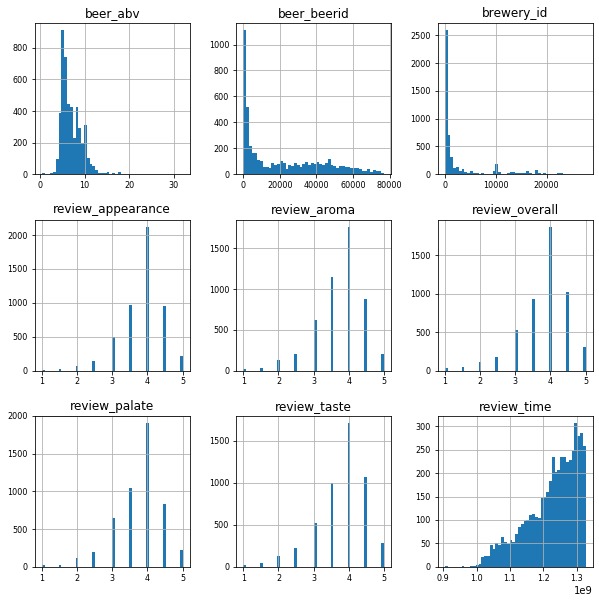

In [115]:
df_subset.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8);

In [116]:
unique_values = df_subset['beer_style'].value_counts().reset_index()
unique_values.columns = ['Value', 'Count']
print(unique_values)

                                Value  Count
0                        American IPA    420
1      American Double / Imperial IPA    266
2             American Pale Ale (APA)    191
3              Russian Imperial Stout    177
4    American Double / Imperial Stout    177
..                                ...    ...
98                         Roggenbier      2
99                              Kvass      2
100                       Black & Tan      1
101                              Faro      1
102                             Sahti      1

[103 rows x 2 columns]


## 2. Prepare Data

In [117]:
df_subset_cleaned = df_subset.copy()

In [118]:
df_subset_cleaned.head()

brewery_id                   brewery_name  review_time  \
859964        13307                  Mikkeller ApS   1317606533   
581443          126         Pete's Brewing Company   1195281294   
1270456         203  Greene King / Morland Brewery   1224109943   
477415          167              Brewery Lobkowicz   1070489226   
1408999         664            Wells & Young's Ltd   1172208746   

         review_overall  review_aroma  review_appearance review_profilename  \
859964              4.0           4.5                4.5             Ghenna   
581443              2.5           3.0                3.5             hwwty4   
1270456             4.0           3.5                4.0            dsa7783   
477415              4.5           4.0                3.5         TastyTaste   
1408999             5.0           4.0                5.0        BadRockBeer   

                  beer_style  review_palate  review_taste  \
859964   American Barleywine            3.5           3.5   
581443             Cream Ale            3.0           2.5   
1270456     English Pale Ale            3.5           3.5   
477415        Czech Pilsener            4.0           4.5   
1408999   Milk / Sweet Stout            5.0           5.0   

                                  beer_name  beer_abv  beer_beerid  
859964                            Big Worst      18.5        56831  
581443   Pete's Wicked Wanderlust Cream Ale       5.6        19950  
1270456                           Abbot Ale       5.0          910  
477415                     Lobkowicz Knight       4.8          444  
1408999      Young's Double Chocolate Stout       5.2           73

In [119]:
#Remove missing values
df_subset_cleaned.dropna(inplace=True)

In [120]:
#Reset index df_subset
df_subset_cleaned.reset_index(drop=True, inplace=True)

In [121]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [122]:
#Create list numeric values
num_cols = ['brewery_id', 'review_time', 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'beer_beerid']

In [123]:
#Instantiate a StandardScaler and called it sc
sc = StandardScaler()
#Fit and transform the numeric feature of X_train_cleaned and replace the data into it
df_subset_cleaned[num_cols] = sc.fit_transform(df_subset_cleaned[num_cols])
df_subset_cleaned[num_cols].head()

brewery_id  review_time  review_overall  review_aroma  review_appearance  \
0    1.865238     1.203087        0.227275      1.080918           1.031792   
1   -0.534488    -0.424306       -1.892927     -1.110935          -0.598875   
2   -0.520469    -0.040775        0.227275     -0.380317           0.216459   
3   -0.527024    -2.084517        0.934009      0.350300          -0.598875   
4   -0.436540    -0.731259        1.640743      0.350300           1.847125   

   review_palate  review_taste  beer_abv  beer_beerid  
0      -0.402764     -0.436742  4.877682     1.614101  
1      -1.143560     -1.820409 -0.609464    -0.078491  
2      -0.402764     -0.436742 -0.864680    -0.952300  
3       0.338031      0.946924 -0.949753    -0.973686  
4       1.819622      1.638758 -0.779608    -0.990713

In [124]:
#Tranform categorical features
from sklearn.preprocessing import LabelEncoder

#Create list of categorical features
cat_cols = ['brewery_name', 'review_profilename', 'beer_style', 'beer_name']

#Instantiate label encoder
for feature in cat_cols:
    le = LabelEncoder()
    df_subset_cleaned[feature] = le.fit_transform(df_subset_cleaned[feature])

In [125]:
df_subset_cleaned.head()

brewery_id  brewery_name  review_time  review_overall  review_aroma  \
0    1.865238           598     1.203087        0.227275      1.080918   
1   -0.534488           678    -0.424306       -1.892927     -1.110935   
2   -0.520469           422    -0.040775        0.227275     -0.380317   
3   -0.527024           173    -2.084517        0.934009      0.350300   
4   -0.436540           918    -0.731259        1.640743      0.350300   

   review_appearance  review_profilename  beer_style  review_palate  \
0           1.031792                 433           4      -0.402764   
1          -0.598875                1759          35      -1.143560   
2           0.216459                1575          47      -0.402764   
3          -0.598875                 988          36       0.338031   
4           1.847125                  84          78       1.819622   

   review_taste  beer_name  beer_abv  beer_beerid  
0     -0.436742        332  4.877682     1.614101  
1     -1.820409       1891 -0.609464    -0.078491  
2     -0.436742         52 -0.864680    -0.952300  
3      0.946924       1495 -0.949753    -0.973686  
4      1.638758       2842 -0.779608    -0.990713

In [126]:
#Drop the original columns of cat_cols from df_subset_cleaned
#df_subset_cleaned.drop(cat_cols, axis=1, inplace=True)

In [127]:
#df_subset_cleaned.head()

In [128]:
#X_cat.head()

In [129]:
#Create list of categorical features
#cat_cols = ['brewery_name', 'review_profilename', 'beer_style', 'beer_name']
#Instantiate OneHotEncoder
#ohe = OneHotEncoder(sparse=False)
#X_cat = pd.DataFrame(ohe.fit_transform(df_subset_cleaned[cat_cols]))
#Extract Feature names
#X_cat.columns = ohe.get_feature_names(cat_cols)

In [130]:
#Create list of categorical features
#beer_style_list = df_subset_cleaned['beer_style'].unique().tolist()
#Instantiate OneHotEncoder
#ohe = OneHotEncoder(sparse=False)
#target_ohe = pd.DataFrame(ohe.fit_transform(df_subset_cleaned[beer_style_list]))
#Extract Feature names
#target_ohe.columns = ohe.get_feature_names(beer_style_list)


In [131]:
#target_ohe.head()

In [132]:
#from sklearn.preprocessing import LabelEncoder
#yle = LabelEncoder()
#df_subset_cleaned['beer_style'] = yle.fit_transform(df_subset_cleaned["beer_style"])
#df_subset_cleaned.head()

In [133]:
#Concatenate df_subset_cleaned with X_cat and save the result to a variable called X
#X = pd.concat([df_subset_cleaned, X_cat], axis=1)
#X.head()

In [134]:
#Save 
df_subset_cleaned.to_csv('../data/interim/beer_transformed_le.csv', index=False)

In [135]:
from src.data.sets import pop_target
df_subset_cleaned, target = pop_target(df=df_subset_cleaned, target_col='beer_style')

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(df_subset_cleaned), columns=df_subset_cleaned.columns)

In [137]:
#Import dump from joblib
from joblib import dump
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']

## Split Dataset

In [138]:
from src.data.sets import split_sets_random
X_train, y_train, X_val, y_val, X_test, y_test = split_sets_random(features, target=target, test_ratio=0.2, to_numpy=True)

In [139]:
#Print the dimensions of `X_train`, `X_val`, `X_test`
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2877, 12)
(959, 12)
(959, 12)


In [140]:
#Save sets into data/processed
from src.data.sets import save_sets
save_sets(X_train, y_train, X_val, y_val, X_test, y_test, path='../data/processed/')

In [145]:
train_dataset = PytorchDataset(X=X_train, y=y_train)
val_dataset = PytorchDataset(X=X_val, y=y_val)
test_dataset = PytorchDataset(X=X_test, y=y_test)

NameError: name 'np' is not defined

In [296]:
#Extract y variable
#target_col = X["beer_style"]
df = X.drop(["beer_style"], axis=1)

In [290]:
#X = X.to_numpy() # np.matrix(df.to_numpy())
#y = Y.to_numpy().transpose() # np.matrix(Y.to_numpy()).transpose()
#m,n = X.shape

In [299]:
#Import your new function `split_sets_random` and split the data into several sets as Numpy arrays
from src.data.sets import split_sets_random

X_train, y_train, X_val, y_val, X_test, y_test = split_sets_random(df, target_col="beer_style", test_ratio=0.2, to_numpy=True)

Expected either target_col or target to have a value


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
# Import save_sets from src.data.sets and save the sets into the folder `data/processed`
from src.data.sets import save_sets

save_sets(X_train, y_train, X_val, y_val, X_test, y_test, path='../data/processed/')

In [33]:
#target=['beer_style']

In [66]:
from src.data.sets import pop_target
df_cleaned, target = pop_target(df=X, target_col= df_subset_cleaned['beer_style'])

KeyError: 'beer_style'

In [ ]:
from src.data.sets import split_sets_random
X_train, y_train, X_val, y_val, X_test, y_test = split_sets_random(X, target=target, test_ratio=0.2, to_numpy=True)

In [25]:
# Split dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

NameError: name 'x' is not defined